---
### Step 1: Load The Data

In [1]:
# Import libraries
import math
import cv2
import csv
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Lambda, Conv2D, Activation, Dropout
from keras.callbacks import ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


In [2]:
lines = []
with open('labeled_images.csv') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for line in reader:
            lines.append(line)
print(len(lines))

4110


In [3]:
#labeled_pictures = pd.read_csv('labeled_images.csv')
shuffle(lines)
train_data, val_data = train_test_split(lines, test_size = 0.2)
print(len(train_data))
print(len(val_data))

3288
822


In [4]:
train_images = []
train_labels = []
for line in train_data:
    img = cv2.cvtColor(cv2.imread('./rec_images/'+str(line[0])+'.jpeg'), cv2.COLOR_BGR2RGB)
    train_images.append(img)
    if int(line[1]) == 0: label = 1
    else: label = 0
    train_labels.append(label)
X_train = np.array(train_images)
y_train = np.array(train_labels)

In [5]:
val_images = []
val_labels = []
for line in val_data:
    img = cv2.cvtColor(cv2.imread('./rec_images/'+str(line[0])+'.jpeg'), cv2.COLOR_BGR2RGB)
    val_images.append(img)
    if int(line[1]) == 0: label = 1
    else: label = 0
    val_labels.append(label)
X_val = np.array(val_images)
y_val = np.array(val_labels)

0
(600, 800, 3)


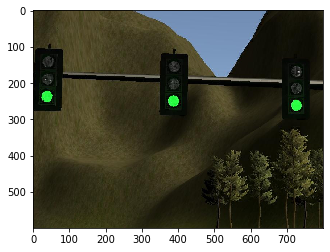

In [7]:
index = 524
plt.imshow(X_train[index])
print(y_train[index])    
print(X_train[index].shape)

---
### Step 2: Define Model

In [ ]:
model = Sequential()
#normalize data
model.add(Lambda(lambda x: (x / 255.0) - 0.5,  input_shape=(600,800,3)))
#layer 1- Convolution, no of filters- 24, filter size= 5x5, stride= 2x2
model.add(Conv2D(24, (5, 5), strides=(2, 2), activation="elu"))
#layer 2- Convolution, no of filters- 36, filter size= 5x5, stride= 2x2
model.add(Conv2D(36, (5,5), strides=(2, 2), activation="elu"))
#layer 3- Convolution, no of filters- 48, filter size= 5x5, stride= 2x2
model.add(Conv2D(48, (5,5), strides=(2, 2), activation="elu"))
#layer 4- Convolution, no of filters- 64, filter size= 3x3, stride= 1x1
model.add(Conv2D(64, (3,3), activation="elu"))
#layer 5- Convolution, no of filters- 64, filter size= 3x3, stride= 1x1
model.add(Conv2D(64, (3,3), activation="elu"))
#flatten image from 2D to side by side
model.add(Flatten())
#layer 6- fully connected layer 1
model.add(Dense(100, activation="elu"))
#dropout layer to avoid overfitting
model.add(Dropout(0.25))
#layer 7- fully connected layer 1
model.add(Dense(50, activation="elu"))
#layer 8- fully connected layer 1
model.add(Dense(10, activation="elu"))
#layer 9- fully connected layer 1
model.add(Dense(1, activation="softmax"))

#model.compile(loss='categorical_crossentropy',optimizer='adam')
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model.fit_generator(generator = data_generator(train_data),
#                    validation_data = data_generator(val_data),
#                    epochs = 2,
#                    steps_per_epoch  = math.ceil(len(train_data) / 128),
#                    validation_steps = math.ceil(len(val_data)   / 128)    )
model.fit(X_train, y_train, epochs=1, batch_size=32)
score = model.evaluate(X_val, y_val, batch_size=32)

model.save('model.h5')
print('Model saved')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
2176/3288 [==================>...........] - ETA: 5:09 - loss: 10.2717 - acc: 0.3557